<a href="https://colab.research.google.com/github/taresadere/taresadere/blob/main/Copy_of_YOLOv3_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3
%pip install -qr requirements.txt  # install

import torch
from yolov3 import utils
display = utils.notebook_init()  # checks

YOLOv3 🚀 v9.6.0-86-g9a05787 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


# 1. Inference

`detect.py` runs YOLOv3 inference on a variety of sources, downloading models automatically from the [latest YOLOv3 release](https://github.com/ultralytics/yolov3/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

detect: weights=['runs/train/exp/weights/best.pt'], source=../451.jpg/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-86-g9a05787d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
image 1/1 /content/451.jpg: 320x640 1 trachoma, 1 other disease, 50.6ms
Speed: 0.4ms pre-process, 50.6ms inference, 75.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


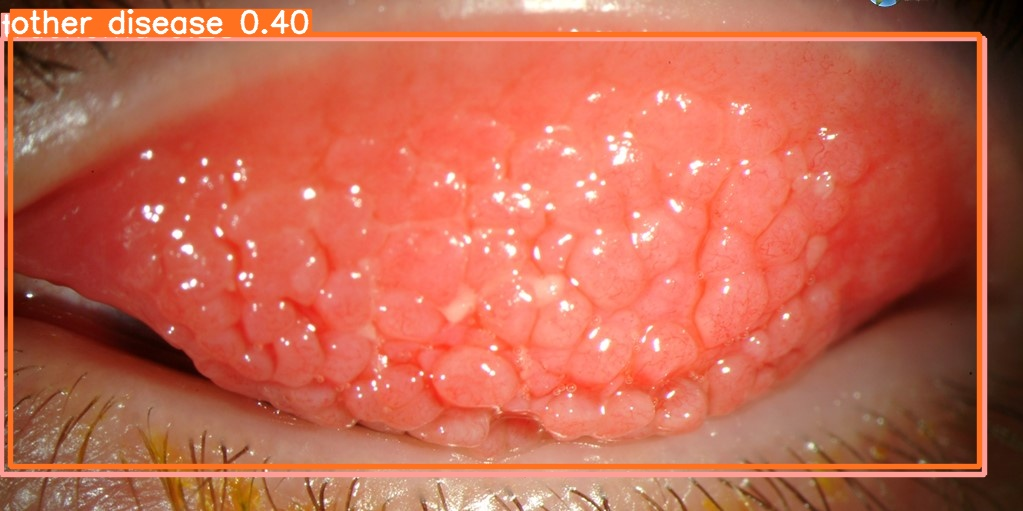

In [13]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../451.jpg/ 
display.Image(filename='runs/detect/exp5/451.jpg' , width=600)

## COCO val
Download [COCO val 2017](https://github.com/ultralytics/yolov3/blob/master/data/coco.yaml) dataset (1GB - 5000 images), and test model accuracy.

In [2]:
# Download COCO val

torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q ../object.zip -d ../ # unzip

100%|██████████| 780M/780M [00:25<00:00, 32.3MB/s]


In [14]:
# Run YOLOv3 on COCO val
!python val.py --weights yolov3.pt --data custom_data.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov3/data/custom_data.yaml, weights=['yolov3.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv3 🚀 v9.6.0-86-g9a05787d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
Traceback (most recent call last):
  File "/content/yolov3/val.py", line 409, in <module>
    main(opt)
  File "/content/yolov3/val.py", line 380, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov3/val.py", line 170, in run
    assert ncm == nc, f'{weights} ({ncm} classes) trained on different --data than what you passed ({nc} ' 

## COCO test
Download [COCO test2017](https://github.com/ultralytics/yolov3/blob/master/data/coco.yaml) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (**20,000 images, no labels**). Results are saved to a `*.json` file which should be **zipped** and submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f -d ../datasets/coco/images

In [15]:
# Run YOLOv3 
!python val.py --weights yolov3.pt --data custom_data.yaml --img 640 --iou 0.65 --half --task test

val: data=/content/yolov3/data/custom_data.yaml, weights=['yolov3.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv3 🚀 v9.6.0-86-g9a05787d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
Traceback (most recent call last):
  File "/content/yolov3/val.py", line 409, in <module>
    main(opt)
  File "/content/yolov3/val.py", line 380, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov3/val.py", line 170, in run
    assert ncm == nc, f'{weights} ({ncm} classes) trained on different --data than what you passed ({nc} '

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [5]:
# Train YOLOv3 on COCO128 for 3 epochs
! python train.py --img 640 --batch 8 --epochs 100 --data custom_data.yaml --weights yolov3.pt --cache --freeze 12

train: weights=yolov3.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 113 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.60 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (10962/10962), done.
From https://github.com/ultralytics/yolov5
 * [new branch]      add/weights_dir    